# Análise exploratória de dados

In [27]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [22]:
colors = ["#4793AF", "#FFC470", "#8B322C"]

sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Descrição dos dados

Um conjunto de dados sobre carros e seus preços e características associados; fabricados entre 1970-82 nos EUA, Europa e Japão.

Este conjunto de dados foi retirado da biblioteca StatLib, mantida na Carnegie Mellon University. O conjunto de dados foi usado na American Statistical Association Exposition de 1983.

In [5]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.shape

(398, 9)

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

#### São 9 variáveis, 5 quantitativas contínuas, 2 quantitativas discretas e 2 qualitativas nominais.

In [9]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,Medida utilizada para determinar a eficiência ...,quantitativa,contínua
1,cylinders,Quantidade de cilindros,quantitativa,discreta
2,displacement,Se refere ao volume de gás sugado ou descarreg...,quantitativa,contínua
3,horsepower,Representa a quantidade de trabalho que um mot...,quantitativa,contínua
4,weight,Peso do veículo,quantitativa,contínua
5,acceleration,Mecanismo que permite ao motorista aumentar ou...,quantitativa,contínua
6,model_year,Ano de fabricação,quantitativa,discreta
7,origin,País de origem,qualitativa,nominal
8,name,Nome do modelo,qualitativa,nominal


## 2. Perguntas de partida e hipóteses

* Existem dados faltantes, se sim quantos e em quais variáveis?
* Qual a distribuição dos dados (variável por variável)?

#### Existem dados faltantes, se sim quantos e em quais variáveis?

In [11]:
df.isnull().sum().sort_values(ascending=False)

horsepower      6
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [37]:
df["cylinders"] = df["cylinders"].astype("float64")
df["weight"] = df["weight"].astype("float64")
df["model_year"] = df["model_year"].astype("float64")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(7), object(2)
memory usage: 30.6+ KB


#### Qual a distribuição dos dados (variável por variável)?

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


<Axes: >

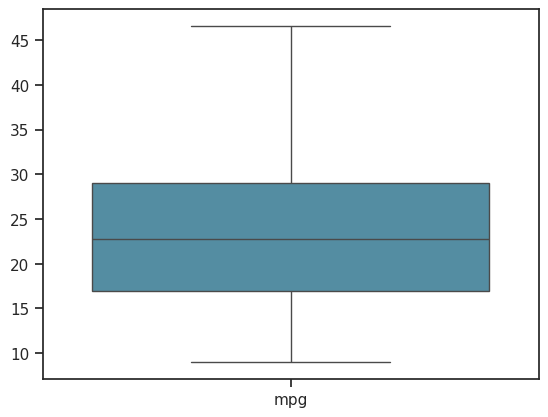

In [43]:
sns.boxplot(df[["mpg"]])

<Axes: >

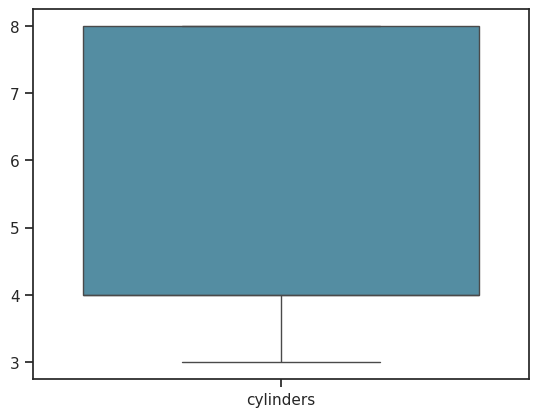

In [60]:
sns.boxplot(df[["cylinders"]])

<Axes: >

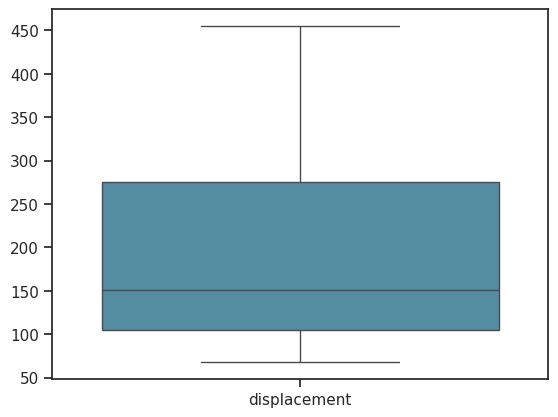

In [61]:
sns.boxplot(df[["displacement"]])

<Axes: >

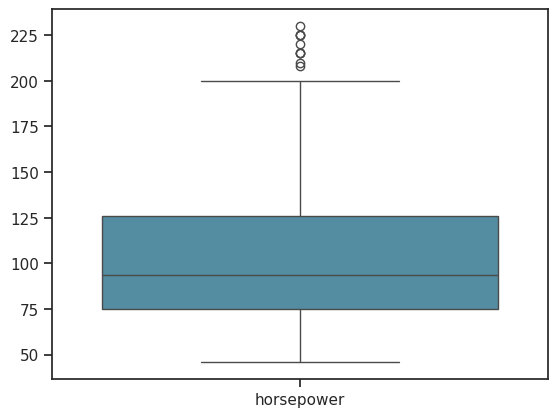

In [62]:
sns.boxplot(df[["horsepower"]])

<Axes: >

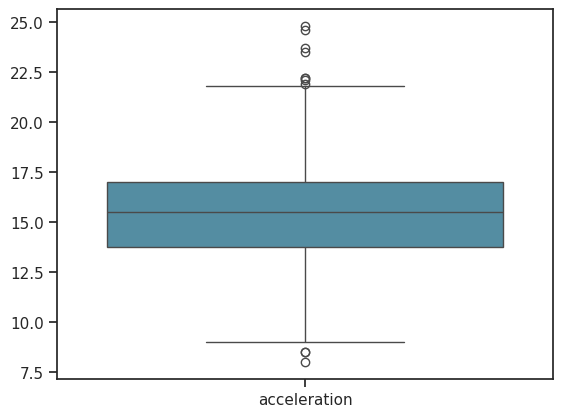

In [63]:
sns.boxplot(df[["acceleration"]])

In [40]:
df.origin.value_counts() 

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='origin'>

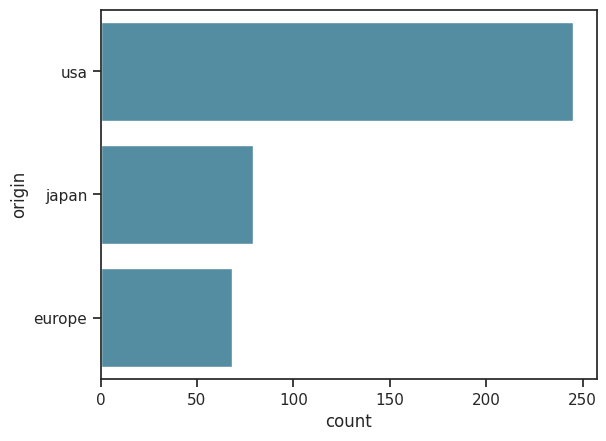

In [64]:
sns.countplot(df["origin"])

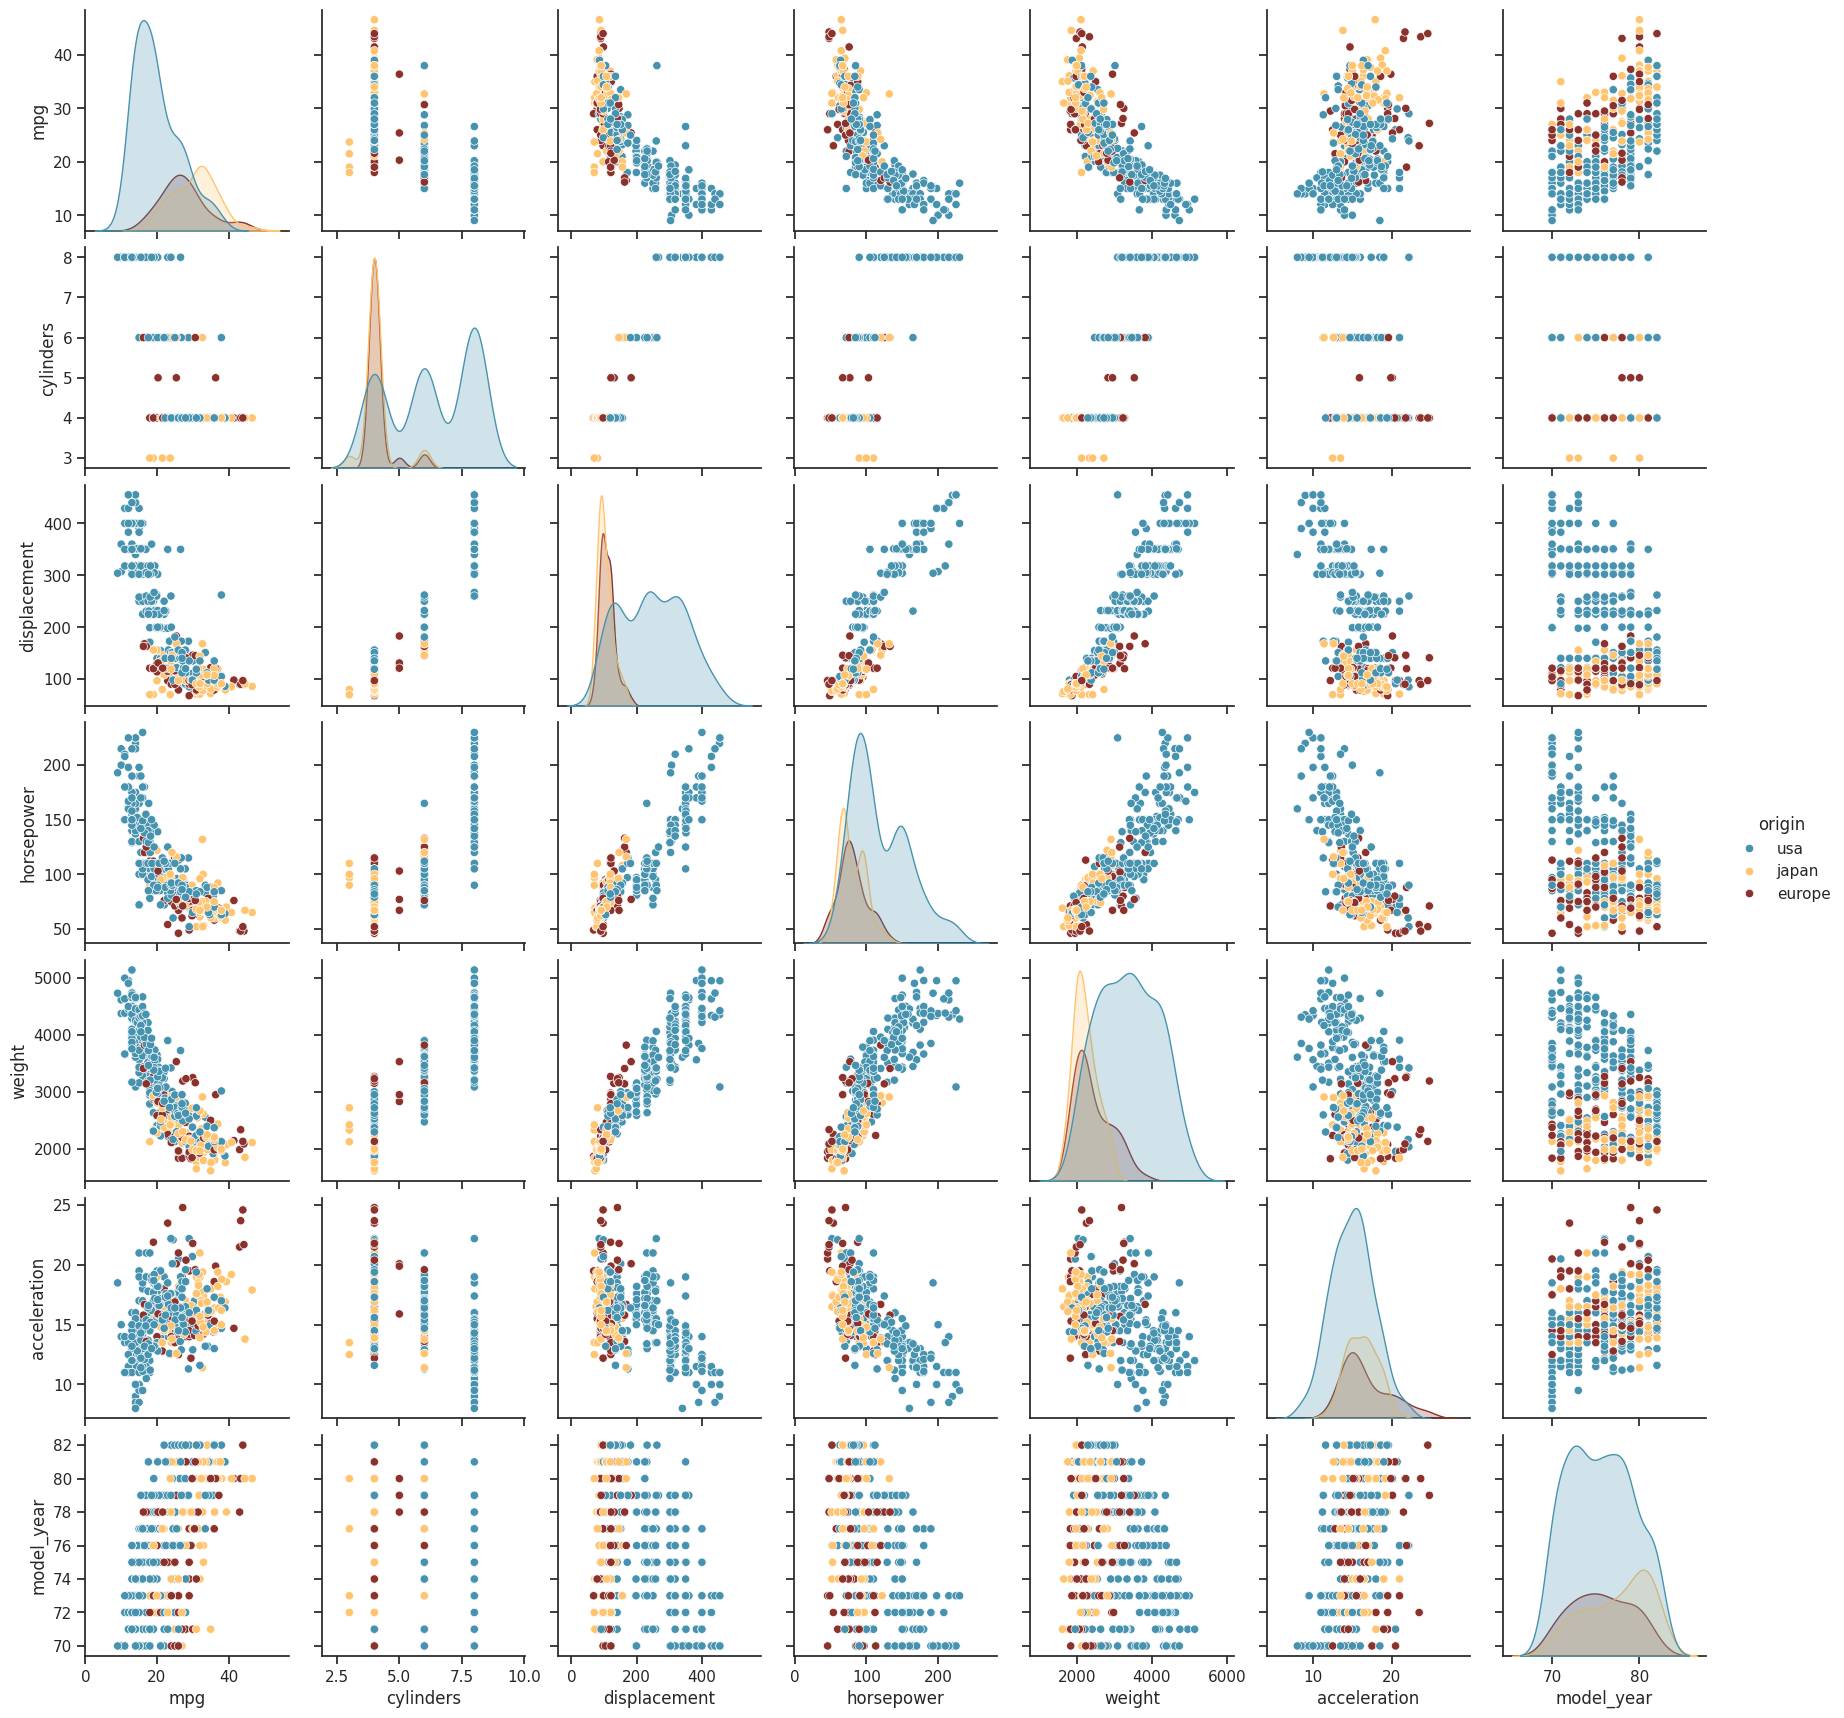

In [41]:
sns.pairplot(df, hue='origin')

## 3. Insights